In [474]:
import networkx as nx
import numpy as np

In [475]:
def remove_self_loops(G):
    edgelist = list(G.edges(data=True))
    print(edgelist)
    for u, v in edgelist:
        if u == v: 
            G.remove_edge(u,v)

In [792]:
def generateGraph():
    G = nx.Graph()
    G = nx.scale_free_graph(6)
    # print(list(nx.selfloop_edges(G)))
    G.remove_edges_from(nx.selfloop_edges(G))
    # print(list(nx.selfloop_edges(G)))
    A = nx.adjacency_matrix(G)
    A = A.toarray()
    # print()
    # print(A)
    norm_to1 = lambda v: 1 if v >= 1 else 0
    alpha = 0.01
    A = np.vectorize(norm_to1)(A).astype("float64")
    # print()
    # print(A, type(A[0][0]))
    return A

In [801]:
def power_iteration(A, epsilon):
    total_pages = len(A[0])
    r = np.array([1/total_pages]*total_pages).T
    # print(r)
    # print(A.dot(r))
    # print(A*r)
    # print(r.dot(A))
    iterations = 1
    while(np.linalg.norm(np.dot(A, r)-r) >= epsilon):
        iterations += 1
        r = A.dot(r)
    print(iterations)
    return A.dot(r)

In [802]:
def google_equation(A, epsilon, beta):
    N = len(A[0])
    # print(np.full((N, N), 1/N)*(1-beta))
    G = A*beta + (1-beta)*np.full((N, N), 1/N) # Page Rank Equation
    return power_iteration(G, epsilon)

In [803]:
def generateSAM(A):
    A_output = A.copy()
    total_pages = len(A_output[0])
    for page in range(total_pages):
        page_links = sum(A_output[:, page])
        if page_links > 0:
            link_val = 1/page_links
            A_output[:, page] = A_output[:, page]*link_val
        else: #Avoid dead ends
            A_output[:, page] = 1/total_pages
    return A_output
    # total_pages = len(A[0])
    # for page in range(total_pages):
    #     linked_pages = np.sum(A[page][:])
    #     print(linked_pages)
    #     prob = linked_pages/total_pages
    #     for p in range(total_pages):
    #         A[page][p] = prob
    # print(A)

In [805]:
A = generateGraph()
print(A)
A = generateSAM(A)
print()
print(A)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]

[[0.         1.         0.         0.16666667 0.         0.16666667]
 [0.         0.         0.33333333 0.16666667 0.         0.16666667]
 [0.33333333 0.         0.         0.16666667 0.         0.16666667]
 [0.33333333 0.         0.33333333 0.16666667 1.         0.16666667]
 [0.         0.         0.33333333 0.16666667 0.         0.16666667]
 [0.33333333 0.         0.         0.16666667 0.         0.16666667]]


In [806]:
result = google_equation(A, 0.0000001, 0.8)

17


In [807]:
print(result,sum(result))

[0.19004866 0.12627957 0.13970466 0.27798288 0.12627957 0.13970466] 0.9999999999999993


In [808]:
result = power_iteration(A, 0.0000001)

22


In [809]:
sum(result)

0.9999999999999994

In [584]:
A = np.array([[0, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 1, 0, 1],[1, 1, 1, 1, 0]], dtype="float64")
A = generateSAM(A)

In [585]:
print(A)

[[0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.5        0.        ]
 [0.         0.         0.5        0.         1.        ]
 [0.5        0.33333333 0.5        0.5        0.        ]]


In [586]:
result = power_iteration(A, 0.01)

In [587]:
result

array([5.14403292e-05, 7.71604938e-05, 2.23879565e-01, 4.42423804e-01,
       3.33568030e-01])

In [588]:
sum(result)

1.0000000000000002

In [209]:
generate_SAM(A)

0.0


In [95]:
def convert_ones(v, alpha_val):
    return 1 - alpha_val if v == 1 else v

In [6]:
A = np.array([[0, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 1, 0, 1],[1, 1, 1, 1, 0]], dtype="float64")

In [7]:
def normalize_matrix(M, alpha):
    M = M.copy()
    col_size = M.shape[1]
    
    for col_index in range(col_size):
        col_aux_ceros = M[:, col_index].copy()
        col_aux_ones = M[:, col_index].copy()

        ones_count = (M[:, col_index] == 1).sum()
        cero_count = col_size - ones_count

        alpha_val = alpha / col_size
        
        col_aux_ceros[(col_aux_ceros == 0)] = alpha_val
        col_aux_ceros[(col_aux_ceros == 1)] = 0

        col_aux_ones[(col_aux_ones == 1)] = (alpha_val*cero_count / ones_count)

        if ones_count > 0:
            M[:, col_index] = M[:, col_index] / ones_count
            
        M[:, col_index] = M[:, col_index] + col_aux_ceros - col_aux_ones
        #ones_count = col_size - alpha_count
        # col = np.vectorize(convert_ones)(M[:, col_index], alpha_val)
    return M

In [ ]:
def get_SAM(M, alpha):
    M = M.copy()
    col_size = M.shape[1]
    
    for col_index in range(col_size):
        col_aux_ceros = M[:, col_index].copy()
        col_aux_ones = M[:, col_index].copy()

        ones_count = (M[:, col_index] == 1).sum()
        cero_count = col_size - ones_count

        alpha_val = alpha / col_size
        
        col_aux_ceros[(col_aux_ceros == 0)] = alpha_val
        col_aux_ceros[(col_aux_ceros == 1)] = 0

        col_aux_ones[(col_aux_ones == 1)] = (alpha_val*cero_count / ones_count)

        if ones_count > 0:
            M[:, col_index] = M[:, col_index] / ones_count
            
        M[:, col_index] = M[:, col_index] + col_aux_ceros - col_aux_ones
        #ones_count = col_size - alpha_count
        # col = np.vectorize(convert_ones)(M[:, col_index], alpha_val)
    return M

In [562]:
print(A)
print()
SAM = normalize_matrix(A, 0.01)
# print(A)
# print()
print(SAM)

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]

[[0.002 0.332 0.002 0.002 0.002]
 [0.497 0.002 0.002 0.002 0.002]
 [0.002 0.332 0.002 0.497 0.002]
 [0.002 0.002 0.497 0.002 0.992]
 [0.497 0.332 0.497 0.497 0.002]]


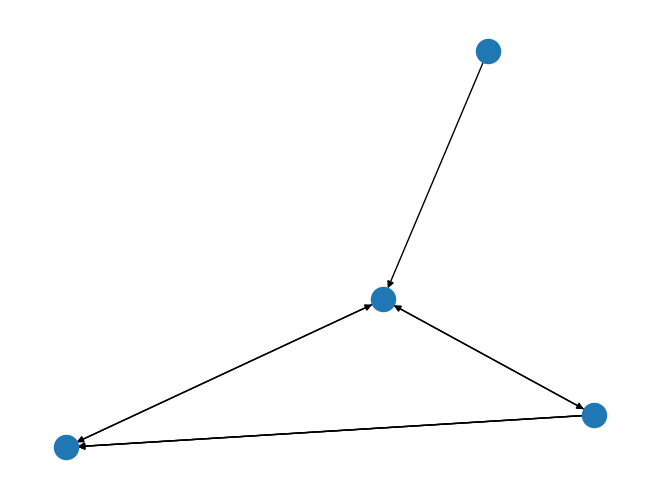

In [251]:
nx.draw(G)

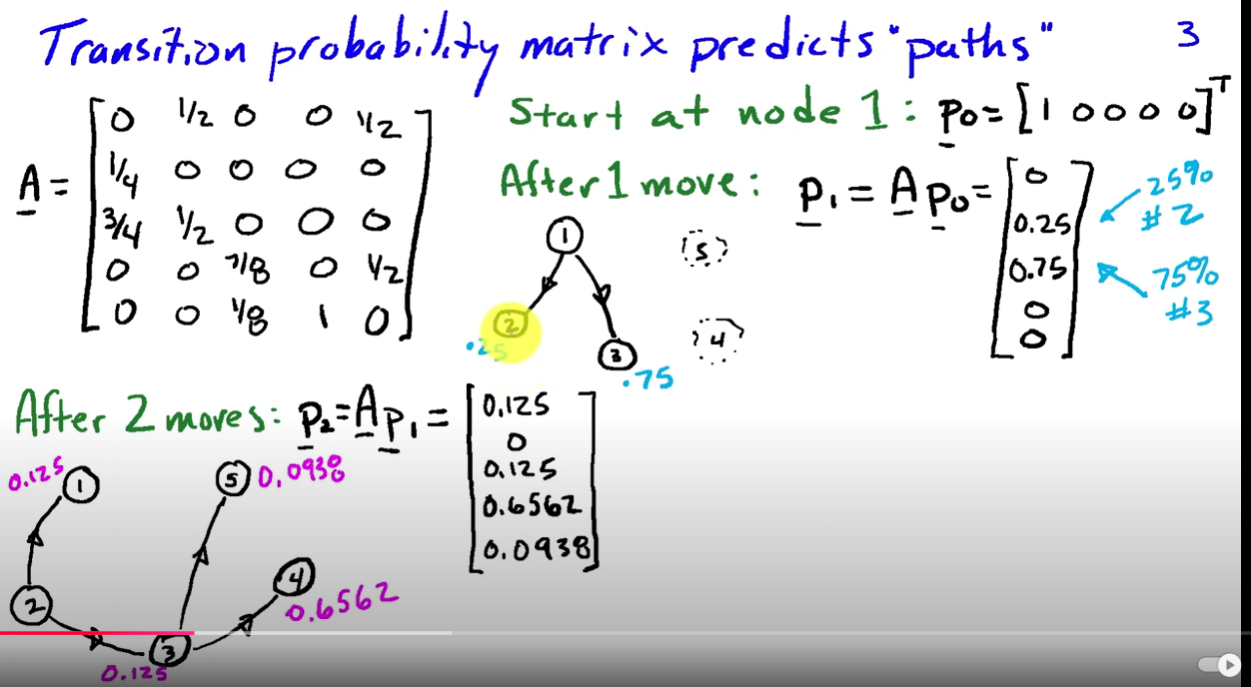

In [7]:
A = np.array([[0, 1/2, 0, 0, 1/2],[1/4, 0, 0, 0, 1/2],[3/4, 1/2, 0, 0, 0],[0, 0, 7/8, 0, 1/2],[0, 0, 1/8, 1, 0]])

In [8]:
A

array([[0.   , 0.5  , 0.   , 0.   , 0.5  ],
       [0.25 , 0.   , 0.   , 0.   , 0.5  ],
       [0.75 , 0.5  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.875, 0.   , 0.5  ],
       [0.   , 0.   , 0.125, 1.   , 0.   ]])

In [558]:
# Power Iteration
p=np.array([1,1,1,1,1]).T
p = p / np.size(p) 

for i in range(1,100+1):
    p = np.dot(SAM, p)
    # if i <=3:
    print(p)
    print("-"*65)

[0.068 0.101 0.167 0.299 0.365]
-----------------------------------------------------------------
[0.03533  0.03566  0.183335 0.446015 0.29966 ]
-----------------------------------------------------------------
[0.0137678  0.01948835 0.23454522 0.38941422 0.3427844 ]
-----------------------------------------------------------------
[0.00843116 0.00881506 0.2011912  0.45745644 0.32410614]
-----------------------------------------------------------------
[0.00490897 0.00617342 0.23134991 0.42245473 0.33511297]
-----------------------------------------------------------------
[0.00403723 0.00442994 0.21315232 0.44828005 0.33010046]
-----------------------------------------------------------------
[0.00346188 0.00399843 0.2253605  0.43430986 0.33286933]
-----------------------------------------------------------------
[0.00331948 0.00371363 0.21830286 0.44309409 0.33156994]
-----------------------------------------------------------------
[0.0032255  0.00364314 0.22255707 0.43831416 0.3322

In [563]:
p=np.array([1,1,1,1,1]).T
p = p / np.size(p) 

_SAM = SAM.copy()

for i in range(1,100+1):
    print(np.dot(_SAM, p))
    print("-"*65)
    _SAM = _SAM * _SAM

[0.068 0.101 0.167 0.299 0.365]
-----------------------------------------------------------------
[0.022048 0.049405 0.071449 0.246217 0.170251]
-----------------------------------------------------------------
[0.00242987 0.01220269 0.01463256 0.20587908 0.03903793]
-----------------------------------------------------------------
[2.95212447e-05 7.44528121e-04 7.74049365e-04 1.88297251e-01
 2.26310561e-03]
-----------------------------------------------------------------
[4.35751946e-09 2.77161061e-06 2.77596813e-06 1.75882890e-01
 8.31918935e-06]
-----------------------------------------------------------------
[9.49398791e-17 3.84091269e-11 3.84092218e-11 1.54669081e-01
 1.15227476e-10]
-----------------------------------------------------------------
[4.50679032e-32 7.37630515e-21 7.37630515e-21 1.19612623e-01
 2.21289154e-20]
-----------------------------------------------------------------
[1.01555795e-62 2.72049388e-40 2.72049388e-40 7.15358977e-02
 8.16148165e-40]
------------